In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from IPython import display
import tensorflow.keras as keras

from os import listdir
from os.path import isfile, join


In [2]:
plt.rcParams['figure.figsize'] = (10,38)

In [3]:
vgg_model = keras.applications.vgg16.VGG16(weights='imagenet')

In [4]:
vgg_model.summary() 

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

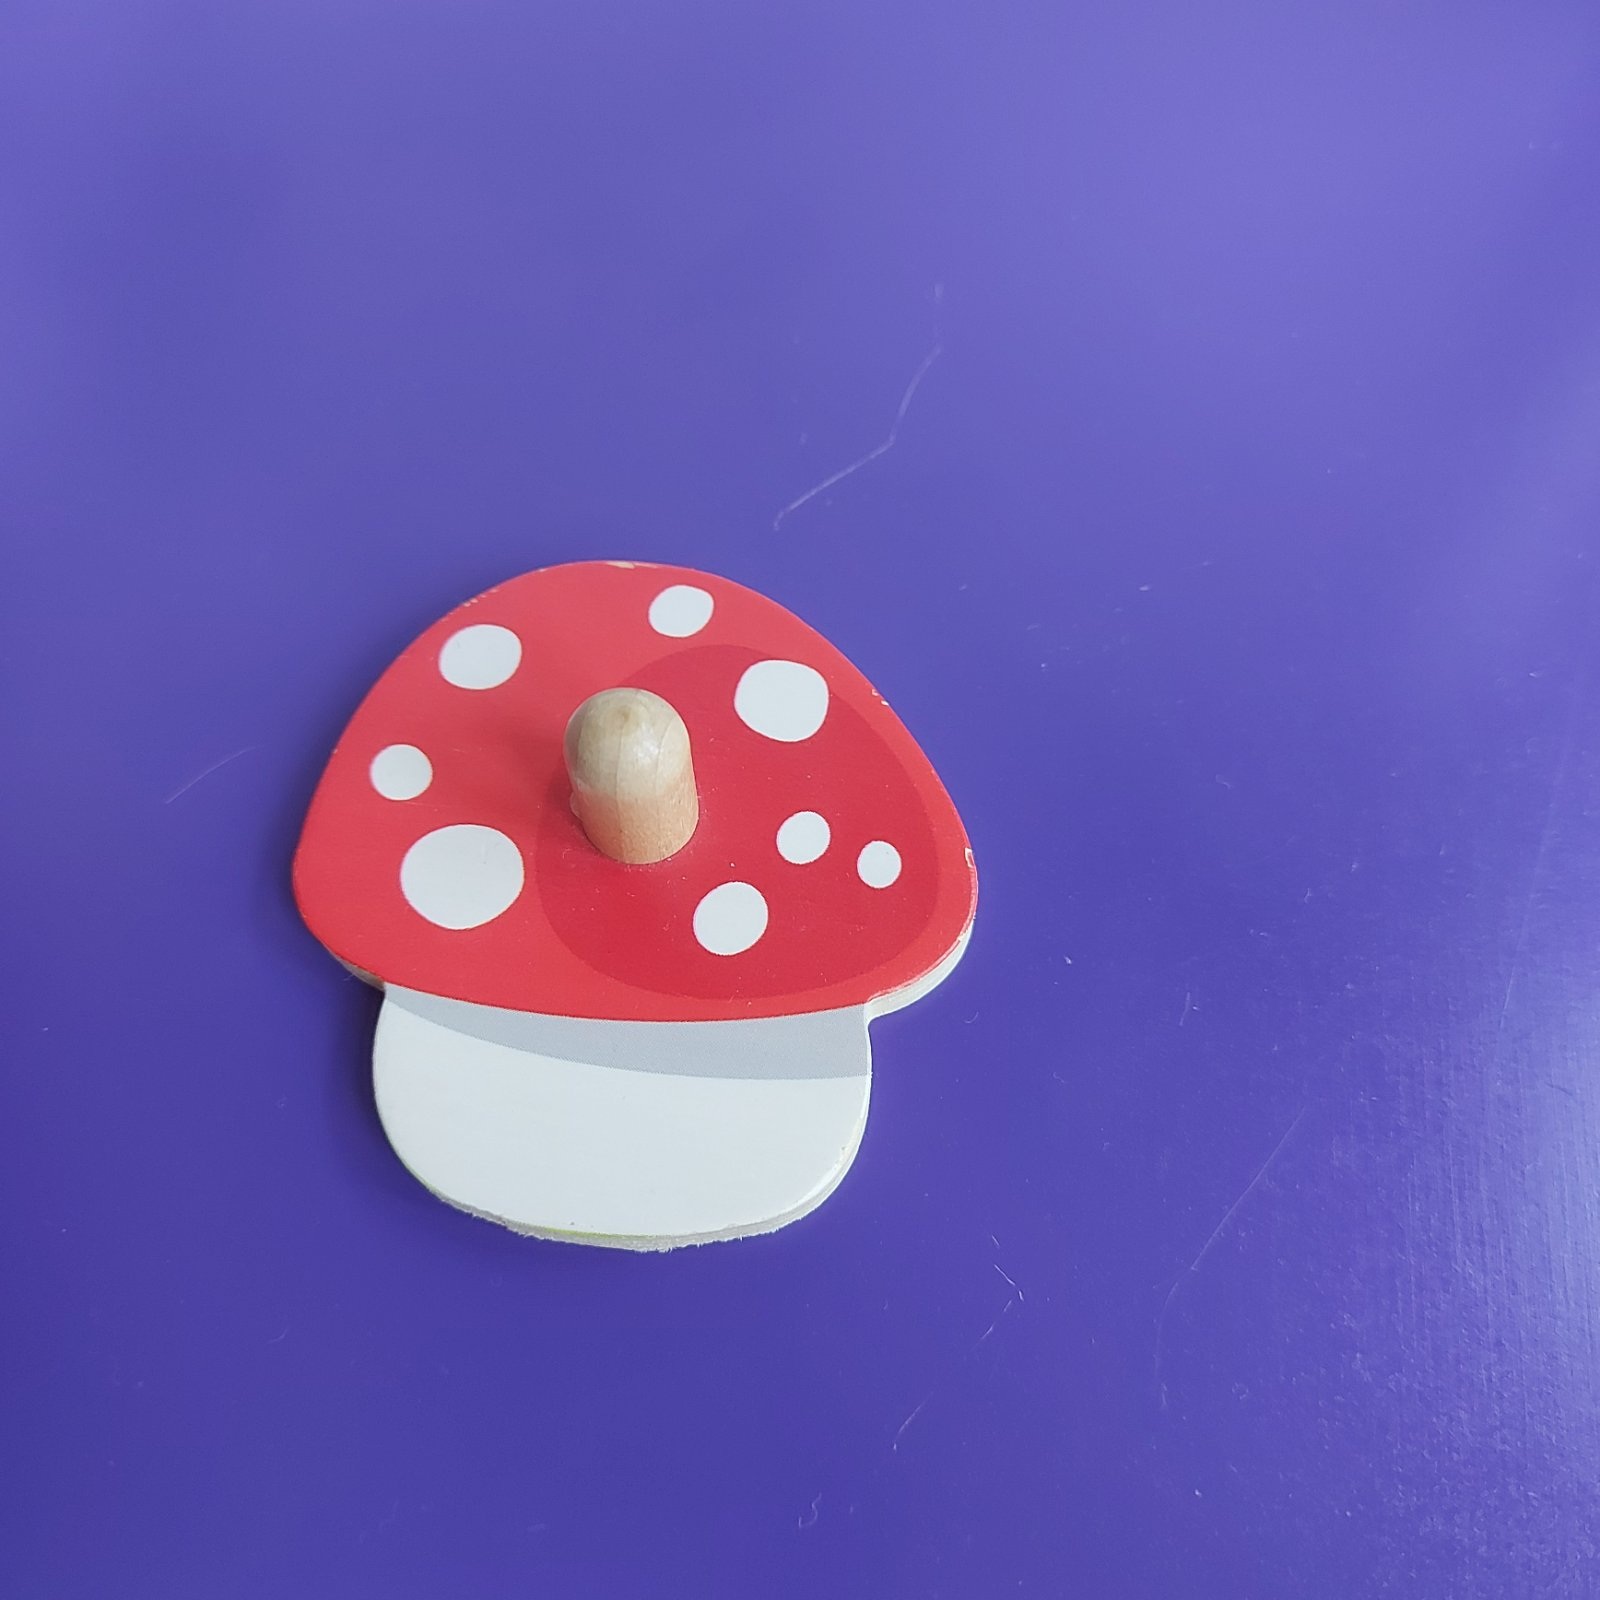

In [5]:
im =keras.preprocessing.image.load_img("./data2/a (1).jpg")
im.size 
im

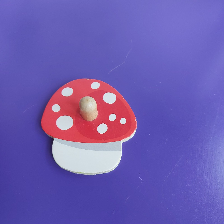

In [6]:
pic = keras.preprocessing.image.load_img("./data2/a (1).jpg",
                                         target_size=(224,224))
pic

In [7]:
numpy_image = keras.preprocessing.image.img_to_array(pic)
numpy_image.shape#[223]


(224, 224, 3)

In [8]:
image_batch = np.expand_dims(numpy_image, axis=0)
image_batch.shape

(1, 224, 224, 3)

In [9]:
processed_image = keras.applications.vgg16.preprocess_input(
    image_batch)


In [10]:
prediction = vgg_model.predict(processed_image)
keras.applications.imagenet_utils.decode_predictions(prediction)

[[('n01910747', 'jellyfish', 0.19210587),
  ('n03920288', 'Petri_dish', 0.059228018),
  ('n12998815', 'agaric', 0.050028622),
  ('n03942813', 'ping-pong_ball', 0.04882906),
  ('n03595614', 'jersey', 0.042765353)]]

'./data2/a (9).jpg'

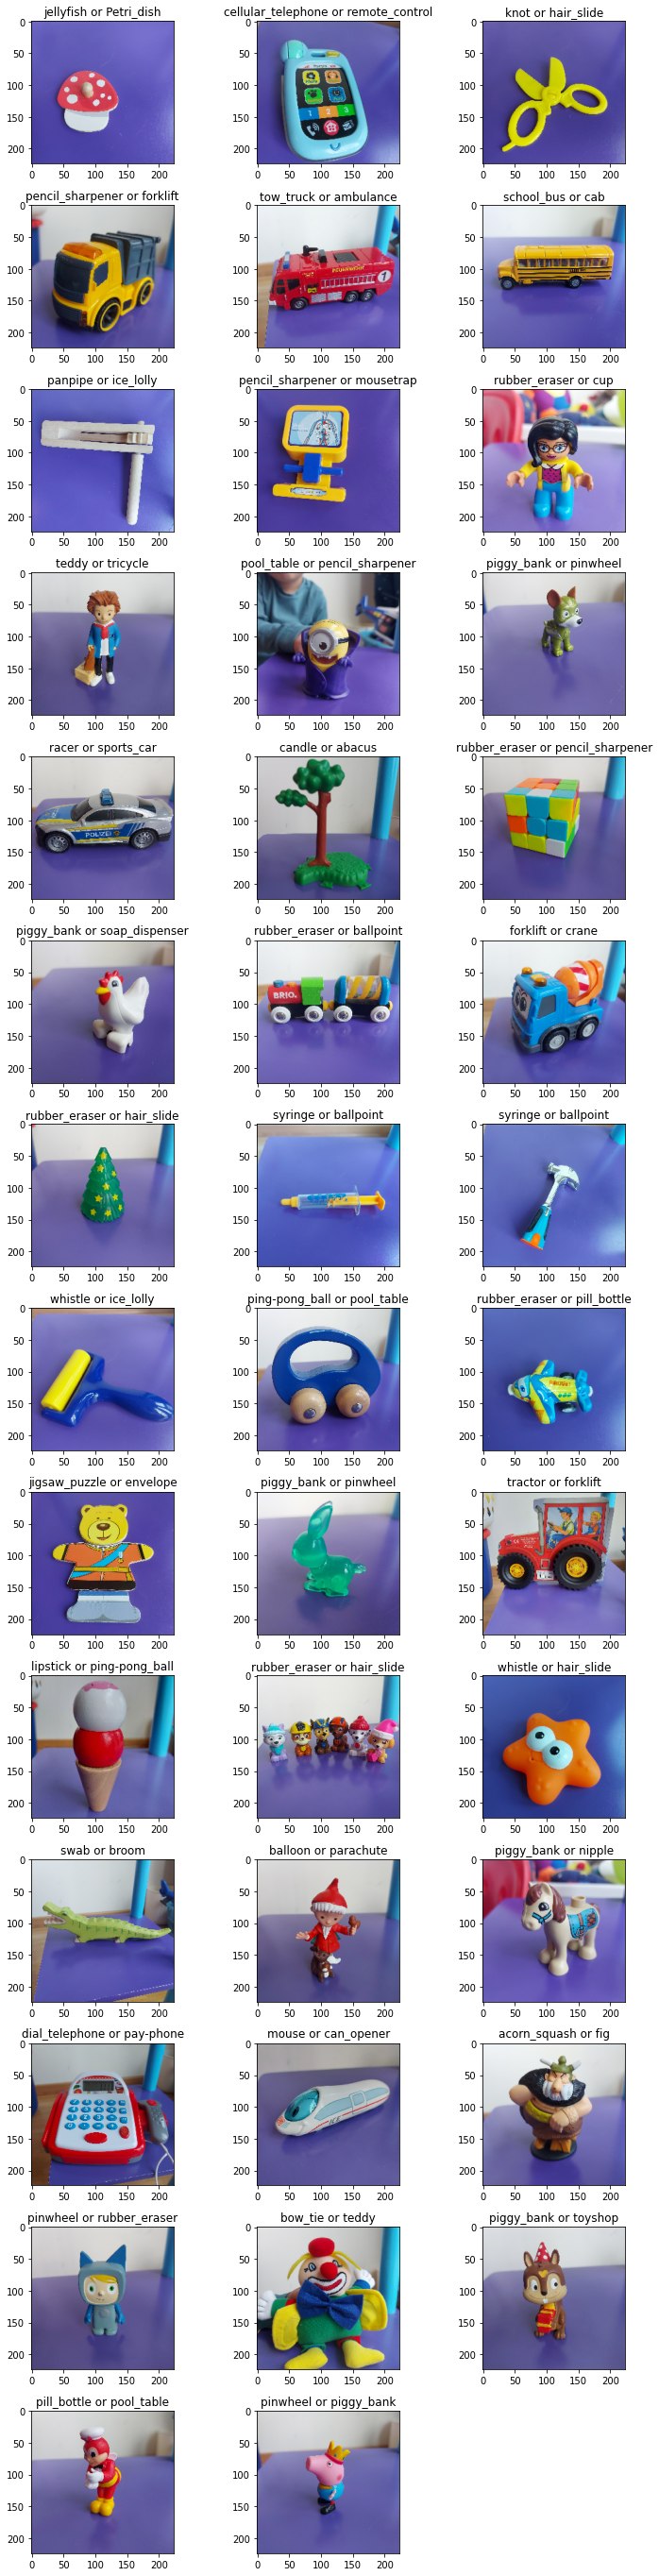

In [21]:
files = [f for f in listdir("./data2/") if f.endswith("jpg")]

def batch_prediction(files = files):

    for i in range(len(files)):
        
        """read and preprocess"""
        my_path = f"./data2/{files[i]}"
        pic = keras.preprocessing.image.load_img(my_path,target_size=(224,224))
        numpy_image = keras.preprocessing.image.img_to_array(pic)
        image_batch = np.expand_dims(numpy_image, axis=0)
        processed_image = keras.applications.vgg16.preprocess_input(image_batch)
        
        """predict"""
        predictions = vgg_model.predict(processed_image)
        label_vgg = keras.applications.imagenet_utils.decode_predictions(
    predictions)

        """plot"""
        plt.subplot(14,3,i+1);
        plt.tight_layout()
        plt.imshow(pic)
        plt.title(f"""{label_vgg[0][0][1]} or {label_vgg[0][1][1]}""" )
    return my_path
    

batch_prediction()

In [12]:
layer_name = vgg_model.layers[4]._name
vgg_model.input

In [22]:
vgg_model.get_layer(layer_name).input

<KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'block1_pool')>

In [23]:
layer_output = vgg_model.get_layer(layer_name).output


In [24]:
intermediate_layer_model = keras.models.Model(inputs=vgg_model.input,
                                 outputs=layer_output)

In [25]:
intermediate_layer_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
Total params: 112,576
Trainable params: 112,576
Non-trainable params: 0
_________________________________________________________________


In [26]:
conv_layer = intermediate_layer_model.predict(processed_image)

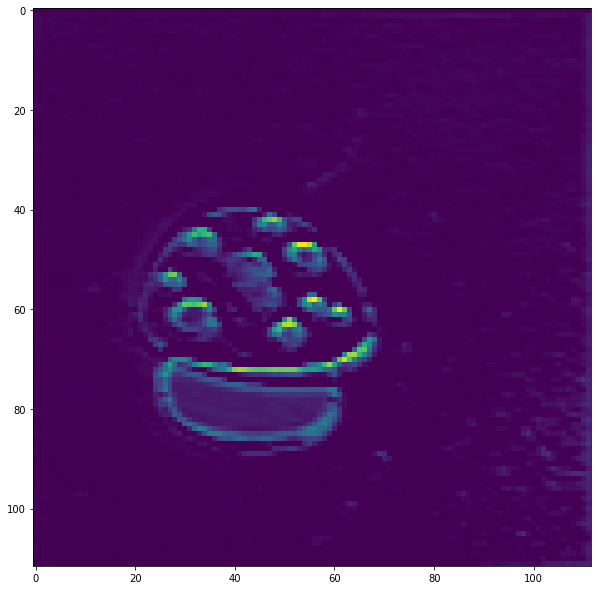

In [27]:
plt.imshow(conv_layer[0, : ,: , 1])